# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Daniyal Dianati
- Advay Ramesh
- Daniel Yoo
- Ricardo Guerrero
- Elijah Pichler

<a id='research_question'></a>
Is there a correlation between an increase in the minimum wage and higher average salaries by state in the US? Specifically, does raising the minimum wage lead to an increase in average salaries across different states in the US?

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

<center><h1><b>Dataset Information</b></h1></center>

<h4>Within the household_median_income_2017.csv it contains the median income from each state in USA. Even though the csv says 2017 it still contains dates/data below 2017 all the way down to 1984</h4>

- **Dataset Name**: household_median_income_2017.csv
- **Link to the dataset**: [2017 Household Median Income Dataset](data/household_median_income_2017.csv)
- **Number of observations**: 51

<h4>Within the minimum_wage_data.csv it contains the minimum wage from each state in USA. This dataset has data from 1968 -> 2020, but since the previous dataset only has 2017 -> 1984 we will clean correctly.</h4>

- **Dataset Name**: minimum_wage_data.csv
- **Link to the dataset**: [Minimum Wage Data]('data/minimum_wage_data.csv')
- **Number of observations**: 2862 

<h4>Within the MinimumWage.csv it contains FederalMinimumWage MeanAnnualInflation MinWageIndexedLastRaiseYear UnemploymentRateDecember GDP_AnnualGrowth. We will be using this dataset to account for 0 values within the previous dataset since some states decided to take the federal minimum wage over making their own.</h4>

- **Dataset Name**: MinimumWage.csv
- **Link to the dataset**: [Federal Minimum Wage Data]('data/MinimumWage.csv')
- **Number of observations**: 91 

<center><h2>Reasons for 3 Datasets</h2></center>
We wanted to be able to compare the results with minimum wage and median income so those first two datasets will be used for comparison. The last dataset will be used solely to replace 0 values with correct data.

# Setup

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

median_income = pd.read_csv('data/household_median_income_2017.csv')

minimum_wage = pd.read_csv('data/minimum_wage_data.csv', encoding='cp1252')
federal_minimum_wage = pd.read_csv('data/MinimumWage.csv')

# Data Cleaning

There were 3 main cleaning steps we needed to perform to be able to use the datasets with ease. 

1. Drop non-overlapping years: Since our first data set only contains data from 1984->2017 we needed to drop all the non-overlapping years from minimum wage.
2. Isolate state minimum wage to a new DataFrame: After finding all the indices that do not overlap we needed to create a new DF that we will be using
3. Drop NaN values: Next step was to drop all the NaN values to reduce bugs later in the process

In [2]:
## Drop years that don't overlap
years_index = minimum_wage[(minimum_wage['Year'] > 2017) | (minimum_wage['Year'] < 1984)].index
minimum_wage.drop(years_index, inplace=True)

## Isolate state minimum wage to a new DataFrame
minimum_wage_state = minimum_wage.loc[:, ['Year', 'State', 'State.Minimum.Wage']].copy()
minimum_wage_state.reset_index(inplace=True)
minimum_wage_state.drop('index', axis=1, inplace=True)

## Drop rows that don't overlap
median_income.dropna(inplace=True)
median_income.drop(labels=0, axis=0, inplace=True)
median_income.reset_index(inplace=True)
median_income.drop(labels="index", axis=1, inplace=True)
median_income = median_income.drop('2013.1', axis=1)

<center><h3>Converting Strings to ints and Changing the data frame format</h3></center>

1. String -> Integer: toInt simplies turns an String into an Integer
2. Pivot Columns: To be able to use the data frames with ease we needed to focus on pivoting some columns to be able to index easier


In [3]:
def toInt(input):
    return int(str(input).replace(',', ''))

In [4]:
## Convert values to integers
for i in range(1984, 2018):
    median_income[str(i)] = median_income[str(i)].apply(toInt)

In [5]:
## Convert median_income to common format
median_income = median_income.melt(id_vars="State", var_name="Year")
median_income = median_income.pivot('Year', 'State', 'value')

In [6]:
median_income

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,D.C.,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1984,39007,72912,48280,35320,56983,58141,67493,45988,58181,44584,...,43737,37817,51883,51957,50878,59772,56374,37955,46743,53668
1985,39941,75777,52019,38019,58782,61398,67734,45917,50065,46499,...,39525,38732,51727,54984,56645,61936,52287,34821,50645,48106
1986,40965,67138,54600,40104,62115,58222,70061,52077,54869,48923,...,42605,39089,51735,56272,52670,63625,57557,35252,56591,50444
1987,40848,68791,55369,38971,62401,54804,68023,56831,60534,50691,...,43782,43840,51171,54914,52608,62090,56549,35618,54583,57110
1988,39852,66133,52811,40299,60507,52370,72346,53423,60942,50756,...,44539,41666,49871,52568,57912,65224,64582,38663,59085,52780
1989,40740,68919,54651,41025,63183,51309,81007,51206,61381,49929,...,46145,43280,49548,58796,59902,65305,61177,41492,55744,56506
1990,42607,71686,53309,41565,60726,56062,70905,49967,56191,48678,...,44821,41211,51492,54984,56728,63979,58577,40381,56022,53740
1991,42852,71482,54101,41248,59253,55442,74196,52601,57353,47967,...,43368,43040,48813,49311,51316,63605,59791,40741,54798,51131
1992,44323,71791,50420,41015,59943,55788,70141,51947,61274,46970,...,45098,41764,48007,58823,56254,65602,58220,34814,57204,51881


In [7]:
#Convert minimum_wage to common format
minimum_wage = minimum_wage.pivot('Year', 'State', 'State.Minimum.Wage')
minimum_wage

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1984,0.0,3.85,0.00,2.70,3.35,1.90,3.37,2.00,2.50,0.00,...,0.0,1.40,3.35,2.50,3.35,2.65,2.30,2.75,3.25,1.60
1985,0.0,3.85,0.00,2.70,3.35,1.90,3.37,2.00,2.50,0.00,...,0.0,1.40,3.35,2.50,3.35,2.65,2.30,2.75,3.25,1.60
1986,0.0,3.85,0.00,2.70,3.35,1.90,3.37,2.00,2.50,0.00,...,0.0,1.40,3.35,2.50,3.35,2.65,2.30,2.75,3.25,1.60
1987,0.0,3.85,0.00,2.70,3.35,1.90,3.37,2.00,2.50,0.00,...,0.0,1.40,3.35,2.50,3.35,2.65,2.30,2.75,3.25,1.60
1988,0.0,3.85,0.00,3.25,3.35,3.00,3.75,3.35,3.50,0.00,...,0.0,3.35,3.35,2.50,3.55,2.65,2.30,3.35,3.35,1.60
1989,0.0,3.85,0.00,3.25,3.35,3.00,3.75,3.35,3.50,0.00,...,0.0,3.35,3.35,2.50,3.55,2.65,2.30,3.35,3.35,1.60
1990,0.0,3.85,0.00,3.25,3.35,3.00,3.75,3.35,3.50,0.00,...,0.0,3.35,3.35,2.50,3.55,2.65,2.30,3.35,3.35,1.60
1991,0.0,4.30,0.00,3.35,4.25,3.00,4.25,3.80,3.70,0.00,...,0.0,3.35,4.65,3.80,3.85,2.65,4.25,3.35,3.80,1.60
1992,0.0,4.75,0.00,3.65,4.25,3.00,4.27,4.25,3.90,0.00,...,0.0,3.35,4.65,4.25,4.25,3.65,4.25,3.80,3.80,1.60


<center><h3>Replacing 0.0 values with federal minimum wage</h3></center>

1. Correct Years: To start the data cleaning process we needed to strip all the years that weren't within 2017-1984
2. Replace 0.0 (float) -> NaN: To be able to use built in functions it was easier to just replace the 0.0 values with NaN
3. Replace NaN values with federal minimum wage: Here we focused on making sure we were adding the correct federal minimum wage to the correct missing years minimum wage
4. Find averages: Now that we have accurate data frames we can now find the averages to produces charts

In [8]:
#Replace all values in minimum_wage where the data is 0.0 with the federal minimum wage (since that state adopted that value)
#Find the average minimum wage (combined for all 50 states) for each year
cleaned_federal_minimum_wage = federal_minimum_wage.loc[(federal_minimum_wage['Year'] >= 1984) & (federal_minimum_wage['Year'] <=2017), ['Year','FederalMinimumWage']]
federal_wage = pd.Series(cleaned_federal_minimum_wage['FederalMinimumWage'].values)

# replace 0 values in minimum_wage with NaN
minimum_wage_fed = minimum_wage.replace(0.0, np.nan)

# fill NaN values in each row with the corresponding value from federal_wage
for i, row in minimum_wage_fed.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])

#Average minimum wage
averageMinimumWage = minimum_wage_fed.mean(axis=1).tolist()
averageMinimumWage = np.array(averageMinimumWage)


#Average Income
averageIncome = median_income.mean(axis=1).tolist()
averageIncome = np.array(averageIncome)


/tmp/ipykernel_249/164020479.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averageMinimumWage = minimum_wage_fed.mean(axis=1).tolist()


# Data Analysis & Results

<center><h1>Review all the data as line plots</h1></center>
<center><p>Before processing any data frames (finding averages) we wanted to show the raw plot lines of the data to see how each each state compares with another state</p></center>

<AxesSubplot:xlabel='Year'>

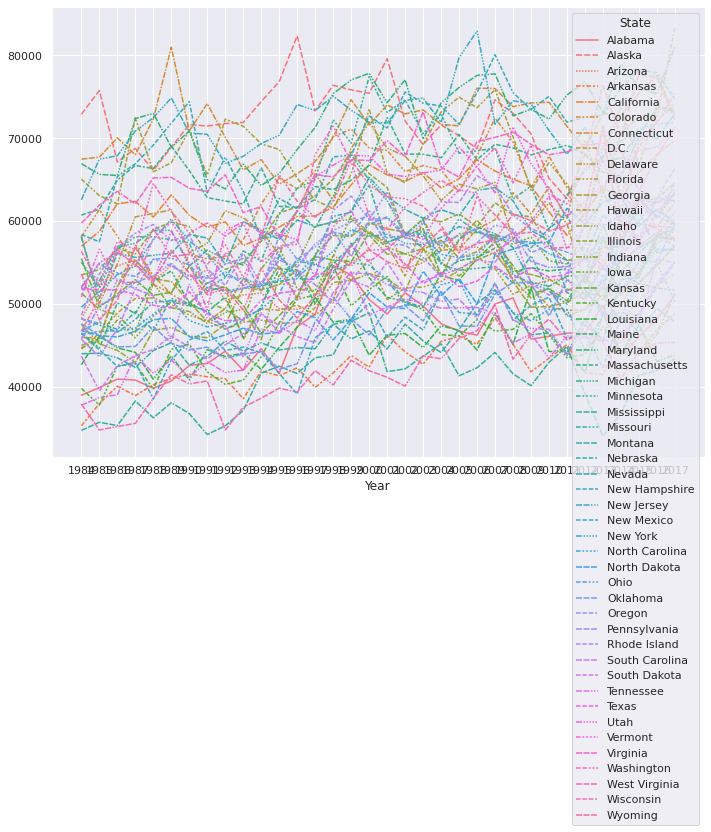

In [9]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
## Initial data visualisation
sns.lineplot(data=median_income)


<AxesSubplot:xlabel='Year'>

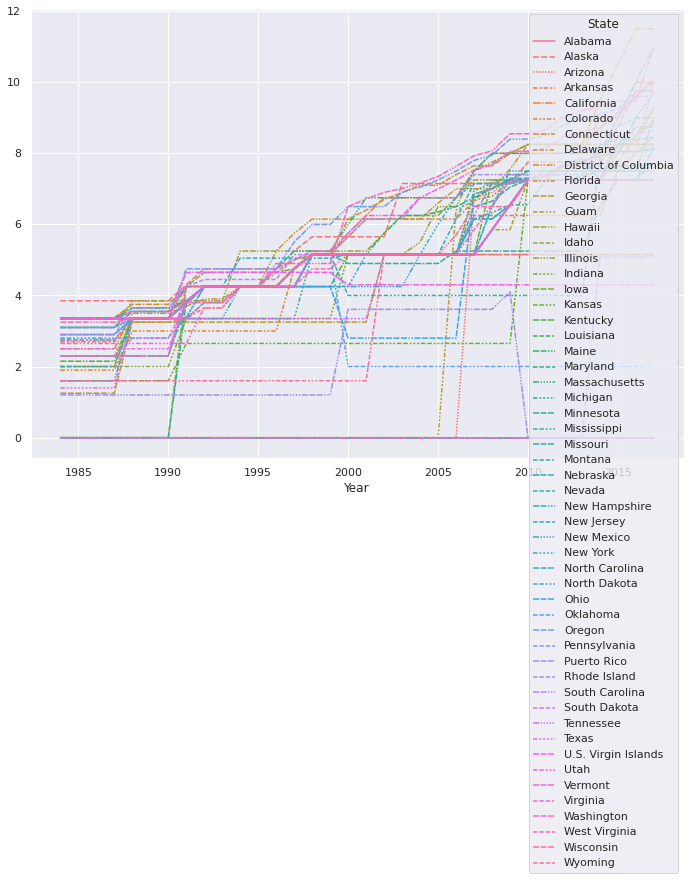

In [10]:
sns.lineplot(data=minimum_wage)

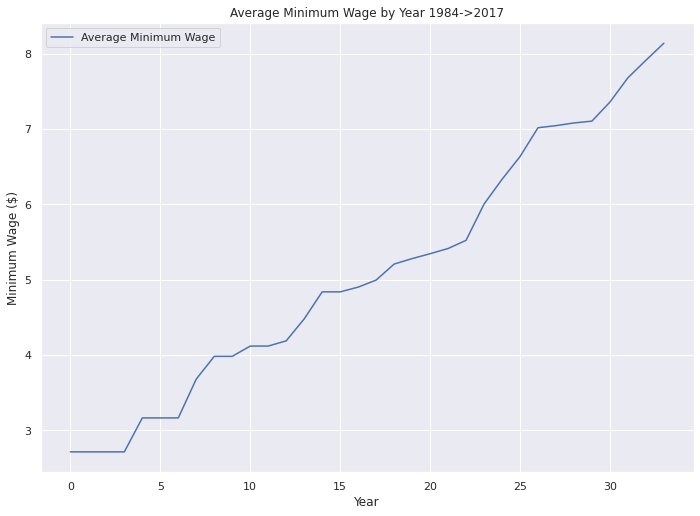

In [11]:
plt.figure()
plt.plot(averageMinimumWage)
plt.title('Average Minimum Wage by Year 1984->2017')
plt.xlabel('Year')
plt.ylabel("Minimum Wage ($)")
plt.legend(['Average Minimum Wage'])
plt.show()

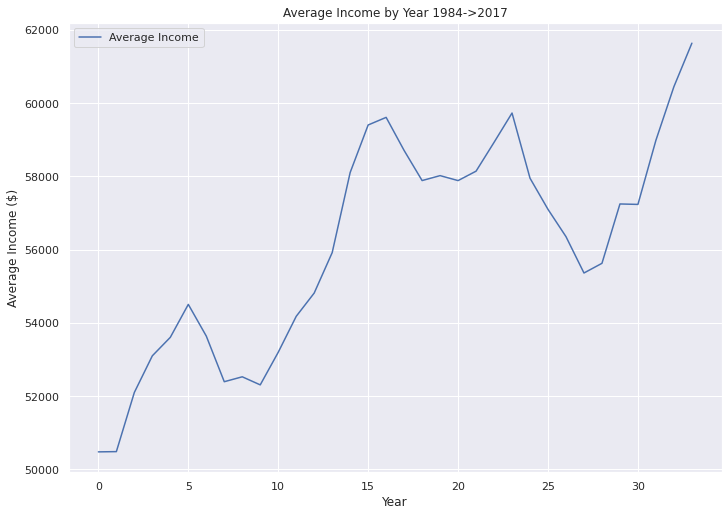

In [12]:
plt.figure()
plt.plot(averageIncome)
plt.title('Average Income by Year 1984->2017')
plt.xlabel('Year')
plt.ylabel("Average Income ($)")
plt.legend(['Average Income'])
plt.show()

In [13]:
wage_percent = []
inc_percent = []
for x, y in zip(averageMinimumWage[0::], averageMinimumWage[1::]):
    wage_percent.append(((y-x)/x)*100)
    
for x, y in zip(averageIncome[0::], averageIncome[1::]):
    inc_percent.append(((y-x)/x)*100)

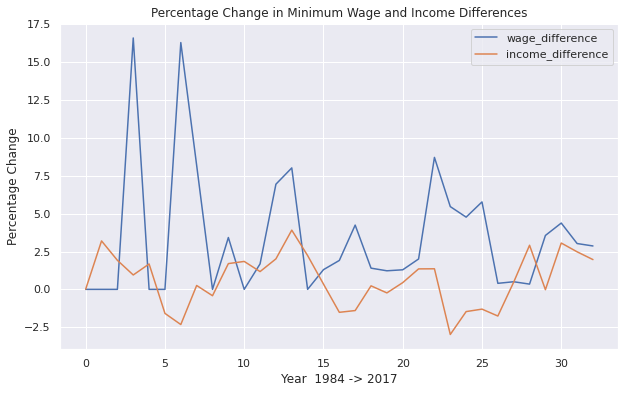

In [14]:
wagediff = np.array(wage_percent)
incdiff = np.array(inc_percent)

years_range = []
for i in range(1984,2017):
    years_range.append(i)
    
year = np.array(years_range)
dfcombine = pd.DataFrame({
    'wage_difference': wagediff,
    'income_difference':incdiff,
    'year':year
})

dfcombine.plot.line(y=['wage_difference', 'income_difference'], figsize=(10,6))
plt.title('Percentage Change in Minimum Wage and Income Differences')
plt.xlabel('Year  1984 -> 2017')
plt.ylabel('Percentage Change')
plt.show()

In [15]:
west_inc = median_income[["California","Nevada","Oregon","Washington","Idaho","Utah","Colorado","Wyoming","Montana","Alaska","Hawaii"]]
midwest_inc = median_income[["Arizona","New Mexico","Oklahoma","Texas"]]
southwest_inc = median_income[["North Dakota","South Dakota","Nebraska","Kansas","Missouri","Illinois","Minnesota","Iowa","Wisconsin","Ohio","Michigan","Indiana"]]
southeast_inc = median_income[["Arkansas","Louisiana","Mississippi","Alabama","Georgia","Florida","South Carolina","North Carolina","Kentucky","Tennessee","Virginia","West Virginia","D.C.","Maryland","Delaware"]]
northeast_inc = median_income[["Pennsylvania","New York","New Jersey","Connecticut","Rhode Island","Massachusetts","Vermont","New Hampshire","Maine"]]
west_wag = minimum_wage[["California","Nevada","Oregon","Washington","Idaho","Utah","Colorado","Wyoming","Montana","Alaska","Hawaii"]]
midwest_wag = minimum_wage[["Arizona","New Mexico","Oklahoma","Texas"]]
southwest_wag = minimum_wage[["North Dakota","South Dakota","Nebraska","Kansas","Missouri","Illinois","Minnesota","Iowa","Wisconsin","Ohio","Michigan","Indiana"]]
southeast_wag = minimum_wage[["Arkansas","Louisiana","Mississippi","Alabama","Georgia","Florida","South Carolina","North Carolina","Kentucky","Tennessee","Virginia","West Virginia","Maryland","Delaware"]]
northeast_wag = minimum_wage[["Pennsylvania","New York","New Jersey","Connecticut","Rhode Island","Massachusetts","Vermont","New Hampshire","Maine"]]

In [16]:
#use code from cells above to filter and determine average minimum wages and average income by region
#Replace all values in minimum_wage where the data is 0.0 with the federal minimum wage (since that state adopted that value)
#Find the average minimum wage (combined for all 50 states) for each year
cleaned_federal_minimum_wage = federal_minimum_wage.loc[(federal_minimum_wage['Year'] >= 1984) & (federal_minimum_wage['Year'] <=2017), ['Year','FederalMinimumWage']]
federal_wage = pd.Series(cleaned_federal_minimum_wage['FederalMinimumWage'].values)

# replace 0 values in minimum_wage with NaN
minimum_wage_fed_w = west_wag.replace(0.0, np.nan)
minimum_wage_fed_mw = midwest_wag.replace(0.0, np.nan)
minimum_wage_fed_sw = southwest_wag.replace(0.0, np.nan)
minimum_wage_fed_se = southeast_wag.replace(0.0, np.nan)
minimum_wage_fed_ne = northeast_wag.replace(0.0, np.nan)

# fill NaN values in each row with the corresponding value from federal_wage
for i, row in minimum_wage_fed_w.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])
for i, row in minimum_wage_fed_mw.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])
for i, row in minimum_wage_fed_sw.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])
for i, row in minimum_wage_fed_se.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])
for i, row in minimum_wage_fed_ne.iterrows():
    i = i - 1984
    minimum_wage_fed.loc[i+1984] = row.fillna(federal_wage[i])

#Average minimum wage per region
averageMinimumWage_w = minimum_wage_fed_w.mean(axis=1).tolist()
averageMinimumWage_w = np.array(averageMinimumWage_w)
averageMinimumWage_mw = minimum_wage_fed_mw.mean(axis=1).tolist()
averageMinimumWage_mw = np.array(averageMinimumWage_mw)
averageMinimumWage_sw = minimum_wage_fed_sw.mean(axis=1).tolist()
averageMinimumWage_sw = np.array(averageMinimumWage_sw)
averageMinimumWage_se = minimum_wage_fed_se.mean(axis=1).tolist()
averageMinimumWage_se = np.array(averageMinimumWage_se)
averageMinimumWage_ne = minimum_wage_fed_ne.mean(axis=1).tolist()
averageMinimumWage_ne = np.array(averageMinimumWage_ne)

#Average Household Income per region
averageIncome_w = west_inc.mean(axis=1).tolist()
averageIncome_w = np.array(averageIncome_w)
averageIncome_mw = midwest_inc.mean(axis=1).tolist()
averageIncome_mw = np.array(averageIncome_mw)
averageIncome_sw = southwest_inc.mean(axis=1).tolist()
averageIncome_sw = np.array(averageIncome_sw)
averageIncome_se = southeast_inc.mean(axis=1).tolist()
averageIncome_se = np.array(averageIncome_se)
averageIncome_ne = northeast_inc.mean(axis=1).tolist()
averageIncome_ne = np.array(averageIncome_ne)

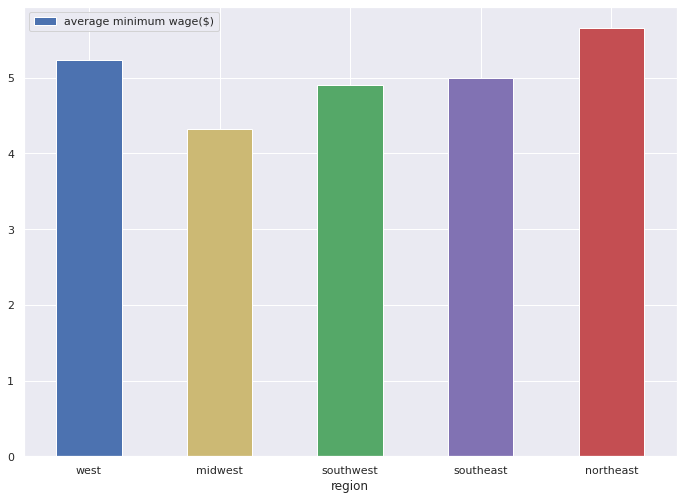

In [17]:
#What region has the highest average minimum wage? 
from itertools import cycle, islice
reg_min_df = pd.DataFrame({'region':['west', 'midwest', 'southwest', 'southeast', 'northeast'], 'average minimum wage($)':[averageMinimumWage_w.mean(), averageMinimumWage_mw.mean(), averageMinimumWage_sw.mean(), averageMinimumWage_se.mean(), averageMinimumWage_ne.mean()]})
my_colors = list(islice(cycle(['b', 'y', 'g', 'm', 'r']), None, len(reg_min_df)))
reg_min_ave = reg_min_df.plot.bar(x='region', y='average minimum wage($)', rot=0, color=my_colors)
#From the resulting graph, the conclusion is that the northeast has the highest average minimum wage. What about the region with the highest average income?

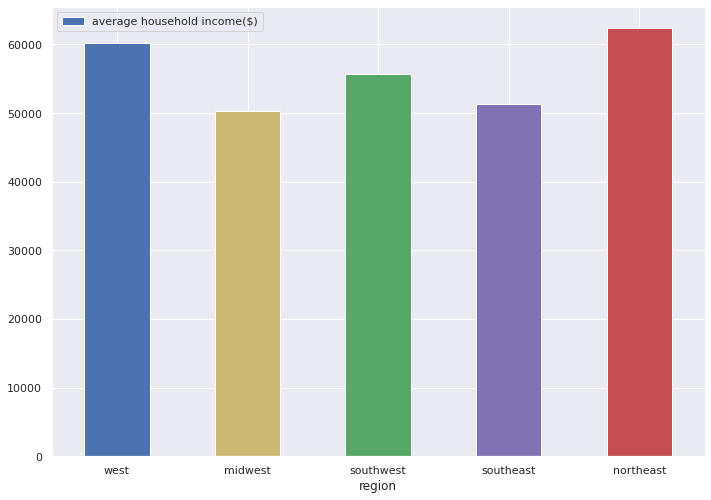

In [18]:
#What region has the highest average houshold income? 
reg_inc_df = pd.DataFrame({'region':['west', 'midwest', 'southwest', 'southeast', 'northeast'], 'average household income($)':[averageIncome_w.mean(), averageIncome_mw.mean(), averageIncome_sw.mean(), averageIncome_se.mean(), averageIncome_ne.mean()]})
reg_inc_ave = reg_inc_df.plot.bar(x='region', y='average household income($)', rot=0, color=my_colors)
#From the graph, the conclusion is also the northeast who has the highest average income. This "by region" analysis supports our hypothesis that
#the states with the higher average minimum wage have a higher average household income.

# Ethics & Privacy

The datasets were based on statistics from the US Census Bureau and the United States Department of Labor, whose records are public (meaning no privacy issues). The source of the “US Minimum Wage by State from 1968 to 2020” Dataset notes that different states have different laws on who is qualified for minimum wage protection. This means that the data set may have slightly different interpretations across the 50 states, possibly excluding some populations in certain states.

The source of the “Household Income by State” data were Current Population Surveys taken by the US Census Bureau. The population sample that is sample is described by the US Census Bureau as, "...about 50,000 [housing units] of them containing approximately 100,000 persons 15 years old and over...Also included are demographic data for approximately 22,000 children 0-14 years old and 400 Armed Forces members...within these households." The survey excluded “institutionalized” and “college and university dormitories”, so there are populations excluded from the dataset. To address this, we’re specifying that the data is targeting income from US households. 

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*

Elijah Pichler: Coded the cleaning process for replacing 0.0 values with federal minimum wage, wrote data description, cleaning, and processes. Added labels/titles to graphs.